In [1]:
%matplotlib notebook
import numpy as np
from matplotlib.pyplot import plot as pl
from matplotlib import cm

from scipy import signal

import ipyvolume as ipv
exec(open('python_functions/transfer_function_explorer.py').read())

# Pen-and paper circuit design

- ## Rules and tricks to simplify calculations
- ## Designing with individual transistors
- ## Operational amplifiers
- ## Exploring the Laplace transformation


## Rules and tricks
- Inspect circuit to find the first relevant quantities.
- Use the principle of superposition of effects
    - Choose a zero potential reference
    - Create auxiliary circuits to calculate individual contributions.
- Use Ohm's law
- Use operational calculus (Oliver Heaviside) for differential equations
$$i=C\frac{dv}{dt}\leftrightarrow I\cdot~e^{j\omega~t+j\phi}=C\cdot\frac{d}{dt}V\cdot~e^{j\omega~t+j\phi}\leftrightarrow~I\cdot~e^{j\omega~t+j\phi}=j\omega~C\cdot~V \cdot~e^{j\omega~t+j\phi}$$

$$\frac{v}{i}=Z=\frac{1}{j\omega~C}=\frac{1}{sC} $$

$$v=L\frac{di}{dt}\leftrightarrow V\cdot~e^{j\omega~t+j\phi}=\cdot\frac{d}{dt}I\cdot~e^{j\omega~t+j\phi}\leftrightarrow~V\cdot~e^{j\omega~t+j\phi}=j\omega~L\cdot~I\cdot~e^{j\omega~t+j\phi}$$

$$\frac{v}{i}=Z={j\omega~L}=sL $$

# Beyond pen and paper..

## Spice simulator

- ### My suggestion is [LTSpice from Analog Devices](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html)

- ### There is an unofficial wiki [ltwiki.org](https://ltwiki.org) that allows to unlock undocumented capabilities

# The bipolar transistor

[2n2222 NPN](https://www.onsemi.com/pdf/datasheet/p2n2222a-d.pdf)

[2n2907 PNP](https://www.onsemi.com/pdf/datasheet/p2n2907a-d.pdf)

## Small signal model
beta $$ \beta=\frac{I_c}{I_b} $$
transconductance $$ g_m = \frac{q\cdot~I_c}{kT}=\frac{I_c}{V_t} $$
Imput resistance $$ R_\pi = \frac {\beta}{V_t} $$


# The three gain configurations

# Some basic element of control theory: feedback
- [Harold S. Black patented feedback amplifiers in 1928-1937](https://patentimages.storage.googleapis.com/b8/63/f0/e6bfd23228c3e1/US2102671.pdf)

<img src="./images/Black.svg" > </img>


# A simple Op-amp

- A good resource about Opamps is [Linear Circuit Design Handbook by Analog Devices](https://www.analog.com/en/education/education-library/linear-circuit-design-handbook.html)

Op-amps have been around since...\*
- First time the term was used: [John R. Ragazzini, et al., Proceedings of the IRE, vol. 35, May 1947, pp. 444-452.](https://worldradiohistory.com/Archive-IRE/40s/IRE-1947-05.pdf)
    
- [George A. Philbrick Researches (GAP/R) K2-W](http://www.philbrickarchive.org/k2-w_refurbished.pdf) commercialized in 1953

- Transistor hybrid opamps
- First monolitic opamp μA702 (Bob Widlar) in 1963 \*.



\* [*opamp history by Analog Devices*](https://www.analog.com/media/en/training-seminars/design-handbooks/Op-Amp-Applications/SectionH.pdf)






# Let's open an Op-amp datasheet

[op27](https://www.ti.com/lit/ds/symlink/op27.pdf): general purpose low noise opamp

[opa847](https://www.ti.com/lit/ds/symlink/opa847.pdf): high speed opamp not unitary gain stable

# Laplace transform

[Laplace transform from Wolfram Mathworld](https://mathworld.wolfram.com/LaplaceTransform.html)

Fourier transform $$ \mathcal{F}\left( f(x)\right)=\int_{-\infty}^{\infty} f(t) e^{-i 2\pi f t} dt$$

Laplace transform $$ \mathcal{L}\left( f(x)\right)=\int_{0}^{\infty} f(x) e^{-st} dt$$
Complex frequency paramater: $$ s = \sigma + i\omega $$

Antitransform is = Fourier transform only if all poles and zeros are on left plane!


# Laplace transform notation

Zero-pole-gain form : $$ \frac{k\cdot(\frac{1}{\tau_a}+s)...}{(\frac{1}{\tau_b}+s)...} ~~~with~~~  zeros = [-\frac{1}{\tau_a},...]; poles = [-\frac{1}{\tau_b},...]$$

Canonical form: $$ \frac{k\cdot\tau_b\cdot(1+\tau_as)...}{\tau_a\cdot(1+\tau_bs)...}$$



In [113]:
ipv.figure(); ipv.show()

choice = [{"zeros": [] , "poles": [-5,-20], "gain": 100, "xlim": [-30,10], "ylim": [-20,20], "zlim":[0,4] },
          {"zeros": [] , "poles": [-0.25+2j,-0.25-2j], "gain": 100, "xlim":[-6,2], "ylim": [-4,4], "zlim":[0,100]},
          {"zeros": [] , "poles": [-1+2j,-1-2j], "gain": 100, "xlim":[-6,2], "ylim": [-4,4], "zlim":[0,100]},
          {"zeros": [] , "poles": [-2], "gain": 10, "xlim":[-30,10], "ylim": [-20,20], "zlim":[0,5]},
          {"zeros": [-3] , "poles": [-2], "gain": 10/3, "xlim":[-30,10], "ylim": [-20,20], "zlim":[0,5]}]

n = 1
zeros, poles, gain = choice[n]["zeros"], choice[n]["poles"], choice[n]["gain"]

system = signal.ZerosPolesGain(zeros,poles,gain)


laplace_plot(system, #This is a custom function: not from a toolset.
                xlim = choice[n]["xlim"],
                ylim = choice[n]["ylim"],
                zlim = choice[n]["zlim"],
                surface = True,
                plane = True,
                line = True,
                res= 1000) 



# Useful tools for stability analisys

- Python library [control](https://python-control.readthedocs.io/en/0.9.2/control.html)
    - Poles-zeros map
    - Bode plot
    - Root locus (Available as online tool at Swarthmore College)(https://lpsa.swarthmore.edu/Root_Locus/RLDraw.html)
    
    drawing the roots of $ 1+k\cdot~H(s)G(s) $ as k increases
    ![control](images/control_system.svg)
    - Pulse and step response

<IPython.core.display.Javascript object>


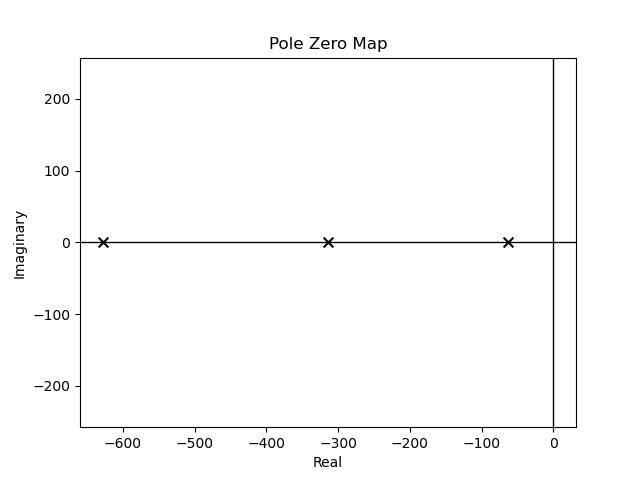

In [122]:
import control as c #Control is a useful control system toolbox
import scipy.signal as sy
from matplotlib import pyplot as plt
%matplotlib notebook

def normalize_gain(zeros,poles):
    return np.product(np.abs([p for p in poles if p != 0]+[1])) / np.product(np.abs(zeros+[1]))



choice = [{"zeros": [-4e4*2*np.pi] , "poles": [-10*2*np.pi], "k": 1},
          {"zeros": [] , "poles": [-10*2*np.pi,-50*2*np.pi], "k": 1}, #Bode criterion
          {"zeros": [] , "poles": [-10*2*np.pi,-50*2*np.pi,-100*2*np.pi], "k": 1}, #Instability
          {"zeros": [-100*2*np.pi,-4e4*np.pi] , "poles": [0,-1e6*2*np.pi,-10e6*np.pi], "k": 1}, #PID
          {"zeros": [+210e4*2*np.pi] , "poles": [-200e3*2*np.pi,-200e6*2*np.pi, -230e6*2*np.pi], "k": 1} #RHPZ 
         ]


n=2
zeros, poles = choice[n]["zeros"],choice[n]["poles"]
gain = choice[n]["k"] * normalize_gain(zeros,poles)



F = sy.ZerosPolesGain(zeros,poles,gain)


system = F.to_tf()
sys = c.tf(system.num,system.den)


plt.figure("Pole zero map")
c.pzmap(sys);




<IPython.core.display.Javascript object>


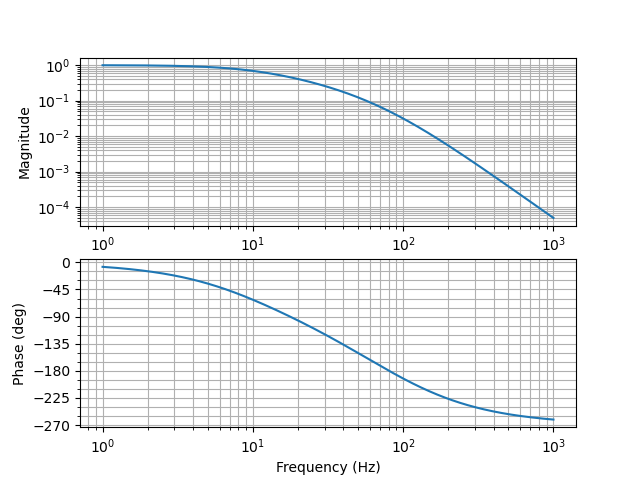

In [123]:
plt.figure("Bode Plot")
c.bode(sys,Hz=True);

<IPython.core.display.Javascript object>


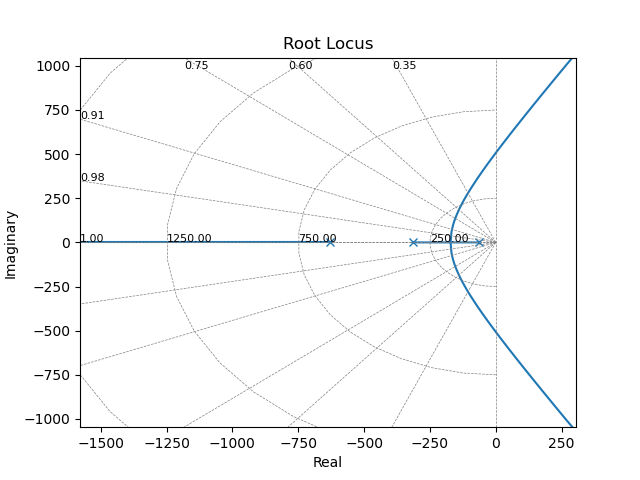

In [124]:
plt.figure("Root locus")
c.rlocus(sys);

<IPython.core.display.Javascript object>


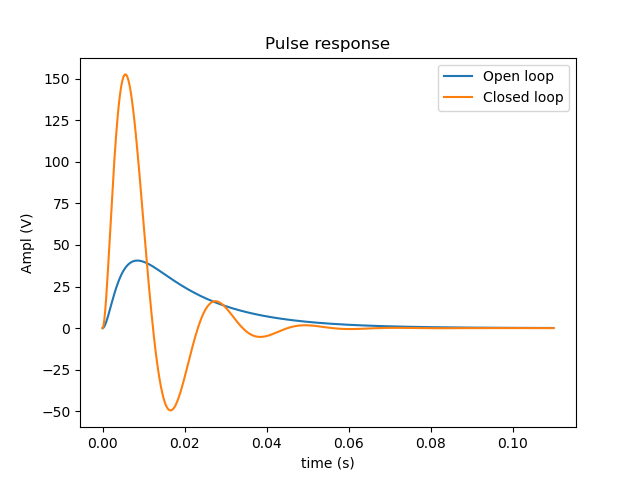

In [126]:
plt.figure("Pulse response")
imp_open = c.impulse_response(sys,squeeze=True)
plt.plot(imp_open.time,imp_open.outputs)


gain = 5
cls_sys = gain*sys/(gain*sys+1)

#c.bode(n);
imp_closed = c.impulse_response(cls_sys,T=imp_open.time,squeeze=True)
plt.plot(imp_closed.time,imp_closed.outputs)

plt.title("Pulse response")
plt.xlabel("time (s)"); plt.ylabel("Ampl (V)"), plt.legend(['Open loop','Closed loop']);


<IPython.core.display.Javascript object>


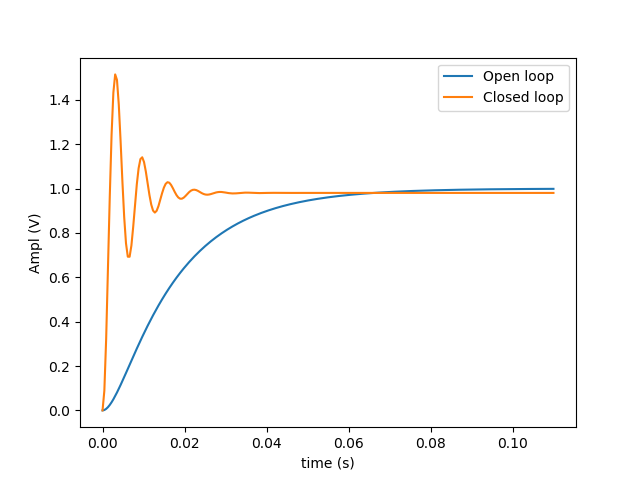

In [121]:
plt.figure("Step response")
step_open = c.step_response(sys,squeeze=True)
plt.plot(step_open.time,step_open.outputs)


step_closed = c.step_response(cls_sys,T=step_open.time,squeeze=True)
plt.plot(step_closed.time,step_closed.outputs)

plt.xlabel("time (s)"); plt.ylabel("Ampl (V)"), plt.legend(['Open loop','Closed loop']);

![PID controller](./images/PID_Schematic.png)


<IPython.core.display.Javascript object>


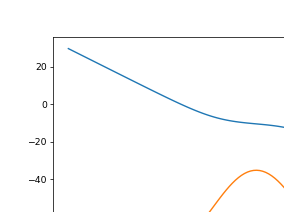

In [4]:
#NOTE: The code below uses just scipy library "signal" instead of control
## Hidden cell

import scipy.signal as sy
from matplotlib import pyplot as plt
%matplotlib notebook


zeros = [-1]

poles = [0,-10]

gain = 3

F = sy.ZerosPolesGain(zeros,poles,gain)

w,mag,phase = sy.bode(F)

plt.semilogx(w,mag)
plt.semilogx(w,phase)




In [5]:
{"a": 4, "b":5}%

SyntaxError: invalid syntax (<ipython-input-5-3c09e73c8f76>, line 1)

In [ ]:
a

In [ ]:
u=**a